# Time Series

# Time Series - Introduction

- Time Series Analysis is one of the hottest and most used domains of Data Science
- The amount of timestamp data is skyrocketing and growing every day
- Applications in practically every industry and domain


### Time Utilities in Pandas 

There are various ways to work with time series data. Most notably, Pandas library has some *amazing* utilities for dealing with timestamp data. In this notebook we will demonstrate some of them, while introducing you to time series analysis.

- Using pd datetime effectively
    - `pd.to_datetime()`
    - `df.index`
- Using a datetime index
    - `.resample()`
    - using `.loc[]` to access dates
    - plotting
- Important uses
    - rolling average
    - fill missing values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Using datetime in pandas effectively

Timestamp is the pandas equivalent of python's Datetime and is interchangeable with it in most cases

In [3]:
pd.to_datetime('2020')

Timestamp('2020-01-01 00:00:00')

Key things to make the most out of pandas datetime:
- Converting a column to a pd datetime (`pd.to_datetime`)
- Setting the index as a datetime index

Let's do this by looking at some data about the data usage of one mobile phone user over the years:

In [4]:
data_usage = pd.read_csv('data/data_usage.csv')
data_usage.head()

,ts,consumption
0,2006-12-16 17:24:00,52.266667
1,2006-12-16 17:25:00,72.333333
2,2006-12-16 17:26:00,70.566667
3,2006-12-16 17:27:00,71.800000
4,2006-12-16 17:28:00,43.100000


Method 1 (bad practice)

In [5]:
data_usage.index = pd.to_datetime(data_usage['ts'])
data_usage = data_usage.drop('ts',1)
data_usage.head()

,consumption
ts,
2006-12-16 17:24:00,52.266667
2006-12-16 17:25:00,72.333333
2006-12-16 17:26:00,70.566667
2006-12-16 17:27:00,71.800000
2006-12-16 17:28:00,43.100000


Method 2 (better practice)

In [6]:
data_usage = pd.read_csv('data/data_usage.csv', index_col='ts', parse_dates=True)
data_usage.head()

,consumption
ts,
2006-12-16 17:24:00,52.266667
2006-12-16 17:25:00,72.333333
2006-12-16 17:26:00,70.566667
2006-12-16 17:27:00,71.800000
2006-12-16 17:28:00,43.100000


### Using a pandas datetime index

With our index as a datetime index there are now some cool things we can do.
- Resample according to a time period
- Plot straight from the data and the x-axis will be a datetime index
- Filter using the `.loc[]` method and the date values

Let's resample using frequency `'D'` for Day. Every second seems too much!

In [7]:
data_daily = data_usage.resample('D').sum()
data_daily.head()

,consumption
ts,
2006-12-16,14680.933333
2006-12-17,36946.666667
2006-12-18,19028.433333
2006-12-19,13131.900000
2006-12-20,20384.800000


### Important Uses

Time Series data is very nuanced. There are some skills that are very useful to have:
- Calculate the rolling average
- Fill missing values

**Rolling and Smoothing**

Let us have a closer look at the power consumption patterns during a single year. The simplest way to plot timestamp data dynamics in Pandas is using plot(), which by default plots a linear plot over time:

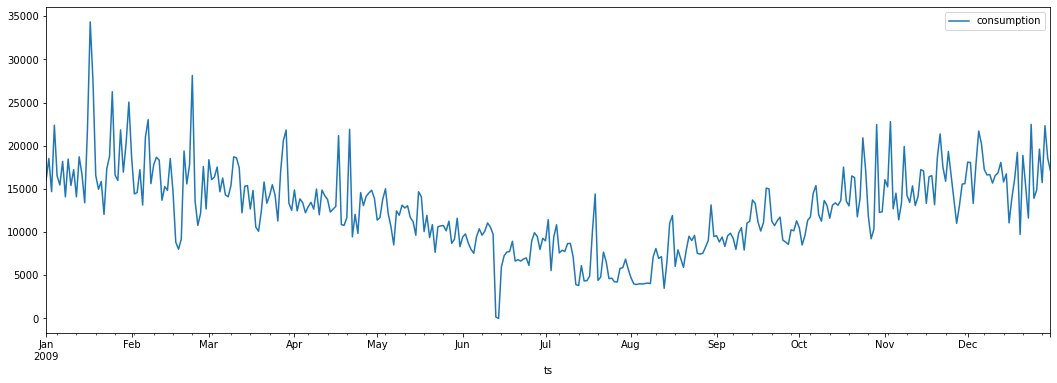

In [8]:
data_daily2009 = data_daily['2009']

data_daily2009.plot(figsize=(18,6));

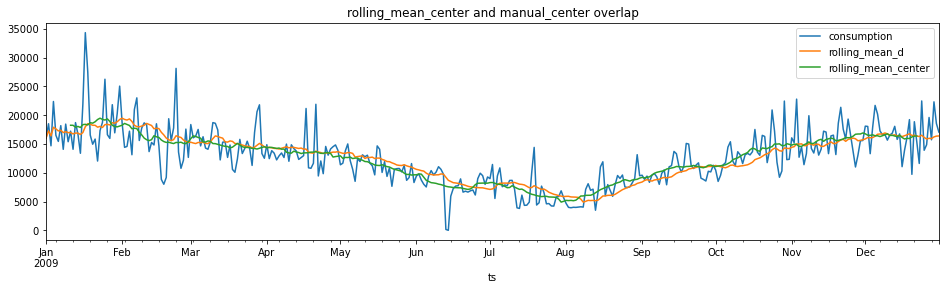

In [9]:
ax = (
    data_daily2009
    .assign(
        rolling_mean_d=lambda df: df['consumption'].rolling('20D').mean(),
        # ! With `center=True` window size cannot be a time frame
        rolling_mean_center=lambda df: df['consumption'].rolling(20, center=True).mean()
    )
    .plot(figsize=(16,4))
)

ax.set_title('rolling_mean_center and manual_center overlap');

**Rolling Average Summary**

A simple way to isolate signal from noise in time series data and get an idea about general time series behavior.

It however has some important drawbacks:

- small window sizes can lead to more noise than signal
- it always lags by the window size (unless centered)
- it is not really informative about the future
- can be significantly skewed by extreme datapoints in the past

**Filling Missing Values**

Often we may be missing data for some of the timestamps. In such cases these smoothing functions can be especially useful — they can help us fill the missings

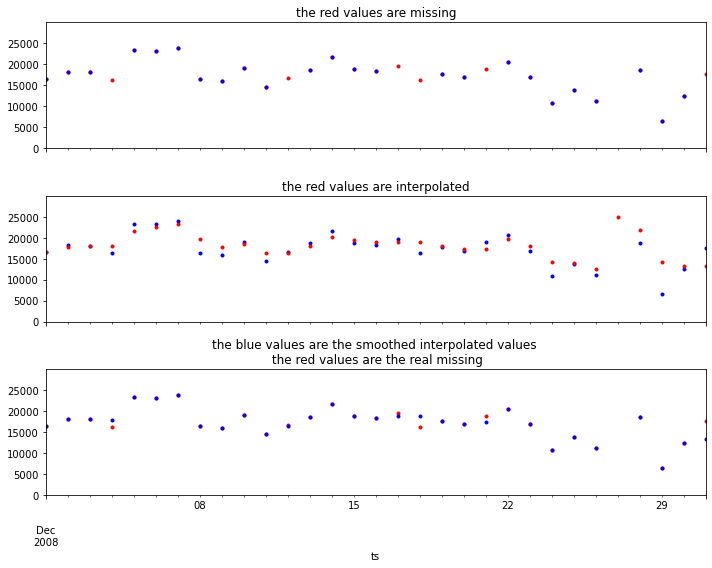

In [10]:
import random
random.seed(918)

data_na = (
    data_daily
    ['2008-12']
    .assign(
        missing=lambda df: [val if random.random() > 0.2 else np.nan for val in df['consumption']],
        smooth=lambda df: df['missing'].ewm(alpha=0.5).mean().fillna(method='ffill'),
        interpolate_smooth=lambda df: df['missing'].combine_first(df['smooth'])
    )
)

fig, (ax_upper, ax_middle, ax_lower) = plt.subplots(3, figsize=(10, 8), sharex=True)

data_na.plot(y='consumption', style='.r', ax=ax_upper, legend=False)
data_na.plot(y='missing', style='.b', ax=ax_upper, legend=False)
ax_upper.set_title('the red values are missing')

data_na.plot(y='consumption', style='.b', ax=ax_middle, legend=False)
data_na.plot(y='smooth', style='.r', ax=ax_middle, legend=False)
ax_middle.set_title('the red values are interpolated')

data_na.plot(y='consumption', style='.r', ax=ax_lower, legend=False)
data_na.plot(y='interpolate_smooth', style='.b', ax=ax_lower, legend=False)
ax_lower.set_title('the blue values are the smoothed interpolated values \n the red values are the real missing')

for ax in (ax_upper, ax_middle, ax_lower):
    ax.set_ylim([0, 30_000])
    ax.set_yticks(range(0, 30_000, 5_000))

fig.tight_layout()

## Example:

Import the data `'data/stock_price.csv'`. Investigate the missing values and clean the data accordingly. Plot the data with a centred moving average.